In [1]:
#Basic Segmentation
#1.Fully convolutional Networks Resnet101 backbone
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained = True).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\user/.cache\torch\checkpoints\resnet101-5d3b4d8f.pth
100.0%
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to C:\Users\user/.cache\torch\checkpoints\fcn_resnet101_coco-7ecb50ca.pth
100.0%


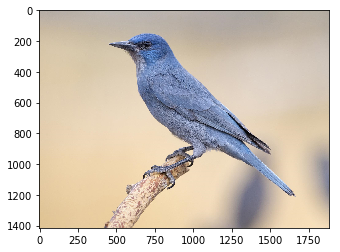

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

img = Image.open('C:/Users/user/Desktop/deeplearningpytorch/segmentation/basicsegmentation/jaybird.png')
plt.imshow(img);
plt.show()

In [6]:
from torchvision import transforms
trf = transforms.Compose([transforms.Resize(256),
                         transforms.CenterCrop(224),
                         transforms.ToTensor(),
                         transforms.Normalize([0.485,0.456,0.406],
                                             [0.229, 0.224, 0.225])])
# Preprocessed image is inp
inp = trf(img).unsqueeze(0)

In [7]:
#pass the input through the net
out = fcn(inp)['out']
print(out.shape)

torch.Size([1, 21, 224, 224])


In [11]:
#make this 21 channeled output into a 2D image or 
#a 1 channeled image, where each pixel of that image corresponds to a class

import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(224, 224)
[0 3]


In [12]:
#convert this 2D image to an RGB image
def decode_segmap(image, nc = 21):
    label_colors = np.array([(0, 0, 0),# 0=background
                             # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                            (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
                            # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                            (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
                            # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
                            (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
                             # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
                             (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)
                            ])
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    
    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
    
    rgb = np.stack([r, g, b], axis = 2)
    return rgb

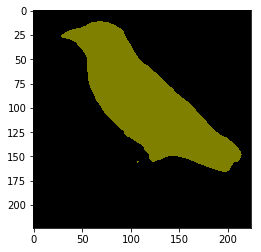

In [16]:
rgb = decode_segmap(om)
plt.imshow(rgb) 
plt.show()

In [21]:
#wrapping up
def segment(net, path, show_orig = True, dev = 'cuda'):
    img = Image.open(path)
    if show_orig: 
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    trf = transforms.Compose([transforms.Resize(640),
                         #transforms.CenterCrop(224),
                         transforms.ToTensor(),
                         transforms.Normalize([0.485,0.456,0.406],
                                             [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0).to(dev)
    out = net.to(dev)(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    rgb = decode_segmap(om)
    plt.imshow(rgb) 
    plt.axis('off')
    plt.show()

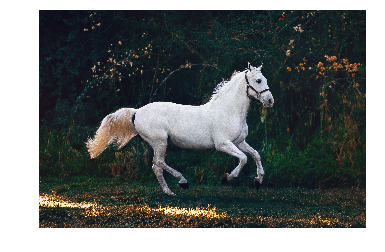

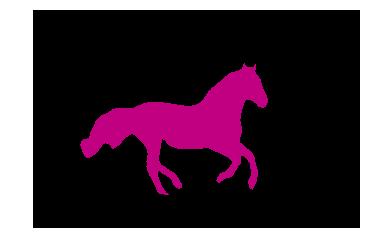

In [22]:
segment(fcn, 
        'C:/Users/user/Desktop/deeplearningpytorch/segmentation/basicsegmentation/horse.png')

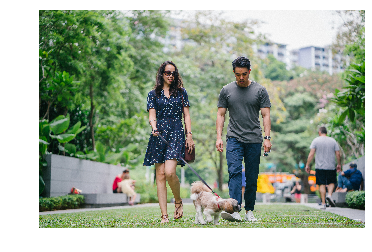

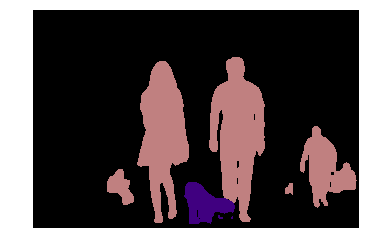

In [23]:
segment(fcn, 
        'C:/Users/user/Desktop/deeplearningpytorch/segmentation/basicsegmentation/multipleobjects.png')

In [25]:
# Now try to use Deeplab model instead of fully convolutional network 
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to C:\Users\user/.cache\torch\checkpoints\deeplabv3_resnet101_coco-586e9e4e.pth
100.0%


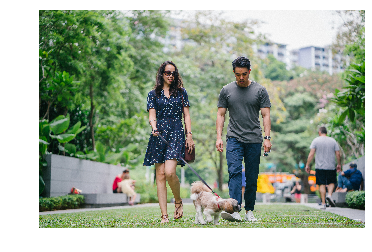

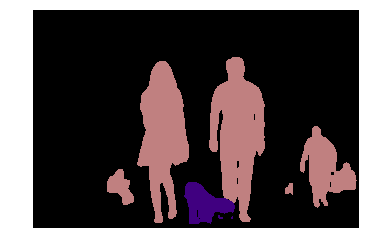

In [26]:
segment(fcn, 
        'C:/Users/user/Desktop/deeplearningpytorch/segmentation/basicsegmentation/multipleobjects.png')